In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [70]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [71]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
df.shape

(10000, 14)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [74]:
df.duplicated().sum()

0

In [75]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [76]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [77]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [78]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [79]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [81]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
X_train_scaled

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [86]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [87]:
model = Sequential()

In [88]:
# model.add(Dense(3, activation='sigmoid', input_dim=11))
# model.add(Dense(1, activation='sigmoid'))
# adding more neural network and improving the accuracy 
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_10 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 12        
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [91]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5103 - accuracy: 0.7739 - val_loss: 0.4547 - val_accuracy: 0.8044
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7895 - val_loss: 0.4284 - val_accuracy: 0.8181
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.8028 - val_loss: 0.4143 - val_accuracy: 0.8238
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8108 - val_loss: 0.4061 - val_accuracy: 0.8238
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8141 - val_loss: 0.4002 - val_accuracy: 0.8288
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4147 - accuracy: 0.8195 - val_loss: 0.3947 - val_accuracy: 0.8288
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8233 - val_loss: 0.3924 - val_accuracy: 0.8319

In [92]:
model.layers[0].get_weights()

[array([[-0.2046624 ,  0.20584813,  0.1985257 , -0.39219782,  0.11740822,
          0.05632821, -0.21911359,  0.08711081, -0.26757032,  0.21439993,
          0.09988799],
        [-0.6268244 , -0.3079148 ,  0.06266902,  0.60767156,  0.7232916 ,
         -0.48098797,  1.3774513 , -0.821177  , -0.14128627, -0.84868187,
         -0.3699497 ],
        [ 0.05915006,  0.12416165, -0.09535945,  0.03127073,  0.0597374 ,
          0.10488465, -0.10662629,  0.5749392 , -0.15528317, -0.21996428,
         -0.4605134 ],
        [ 0.44199553,  0.16287236, -0.6299139 , -0.06084578, -0.38274232,
         -0.7340248 , -0.04434655, -0.22889021,  0.066015  ,  0.47733143,
         -0.26707256],
        [-0.09833629,  1.1702379 , -1.218907  , -0.9570406 ,  0.24520046,
         -0.16885552, -0.06940226, -0.37514088,  0.38847044, -0.3817889 ,
         -0.546489  ],
        [-0.4614222 , -0.19803527,  0.2360662 , -0.91395456,  0.07782106,
         -0.36646226, -0.0084923 ,  0.3291683 , -0.6407755 ,  0.3873581

In [93]:
model.layers[1].get_weights()

[array([[ 1.49117455e-01,  3.27292413e-01,  4.76406842e-01,
          3.15647095e-01, -6.45003378e-01,  8.31880569e-02,
          1.51378229e-01, -9.07924585e-03,  2.22648121e-02,
         -2.22434491e-01, -9.25787628e-01],
        [-4.51915324e-01, -5.77667989e-02, -4.84753912e-03,
         -8.16672947e-03,  1.20336711e+00,  6.11267626e-01,
          2.89109021e-01, -2.11601958e-01, -1.13042951e-01,
         -3.75242323e-01, -3.31576526e-01],
        [ 8.71837139e-01, -7.37876236e-01, -1.28654927e-01,
         -2.95968801e-01, -6.44439042e-01,  2.14378774e-01,
         -7.99937323e-02, -5.65619648e-01, -2.25507066e-01,
          3.28366041e-01, -4.34681237e-01],
        [ 3.37593168e-01, -4.67615694e-01,  1.30727917e-01,
         -2.31616750e-01, -7.58132100e-01, -7.88798928e-02,
         -9.58783031e-02,  3.86521928e-02, -1.32692292e-01,
          7.26675689e-01, -5.53260386e-01],
        [-2.69365162e-01, -5.98319471e-01,  5.45792162e-01,
         -3.25524509e-01, -9.04227491e-04,  

In [94]:
y_log = model.predict(X_test_scaled)

In [95]:
y_pred = np.where(y_log<0.5, 0, 1)

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test, y_pred)

0.8495

In [98]:
import matplotlib.pyplot as plt

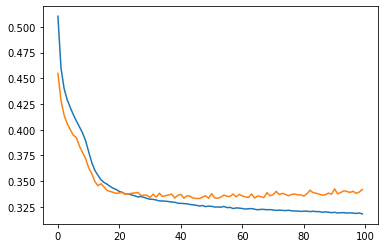

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

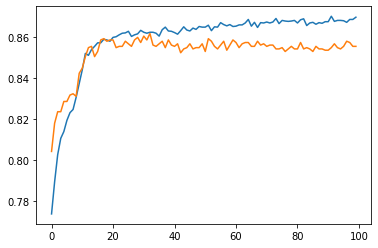

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])